In [1]:
# Suppress warnings 
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

## 1. Imports

In [2]:
import numpy as np
import pandas as pd
np.set_printoptions(linewidth=200)
pd.options.display.max_columns = 100
pd.options.display.max_rows = 100
pd.options.display.max_colwidth = 100

# matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style="darkgrid")

# import other libraries
import random

## 2. Read in Data

In [9]:
!ls ../data/hapt_data_set/RawData | grep acc | head -3

acc_exp01_user01.txt
acc_exp02_user01.txt
acc_exp03_user02.txt


In [11]:
!ls ../data/hapt_data_set/RawData | grep gyro | head -3

gyro_exp01_user01.txt
gyro_exp02_user01.txt
gyro_exp03_user02.txt


In [12]:
%%time
root = '../data/hapt_data_set/RawData/'
acc_exp01_user01 = pd.read_table(root + 'acc_exp01_user01.txt', sep=' ', header=None, names=['x', 'y', 'z'])
gyro_exp01_user01 = pd.read_table(root + 'gyro_exp01_user01.txt', sep=' ', header=None, names=['x', 'y', 'z'])

CPU times: user 24 ms, sys: 0 ns, total: 24 ms
Wall time: 23.8 ms


## 3. Plot Acceleration & Gyroscope Data
* The features selected for this database come from the accelerometer and gyroscope 3-axial raw signals tAcc-XYZ and tGyro-XYZ.
* The time domain signals (prefix 't' to denote time) were captured at a constant rate of 50 Hz.
* Then they were filtered using a median filter and a 3rd order low pass Butterworth filter with a corner frequency of 20 Hz to remove noise.
* Similarly, the acceleration signal was then separated into body and gravity acceleration signals (tBodyAcc-XYZ and tGravityAcc-XYZ) using another low pass Butterworth filter with a corner frequency of 0.3 Hz.

### 3.0 Plot raw acceleration & gyroscope data (50Hz)
* The features selected for this database come from the accelerometer and gyroscope 3-axial raw signals tAcc-XYZ and tGyro-XYZ.
* The time domain signals (prefix 't' to denote time) were captured at a constant rate of 50 Hz.

In [24]:
print('acc_exp01_user01', acc_exp01_user01.shape)
display(acc_exp01_user01.head(3))

acc_exp01_user01 (20598, 3)


,x,y,z
0,0.918056,-0.112500,0.509722
1,0.911111,-0.093056,0.537500
2,0.881944,-0.086111,0.513889


In [25]:
print('gyro_exp01_user01', gyro_exp01_user01.shape)
display(gyro_exp01_user01.head(3))

gyro_exp01_user01 (20598, 3)


,x,y,z
0,-0.054978,-0.069639,-0.030849
1,-0.012523,0.019242,-0.038485
2,-0.023518,0.276417,0.006414


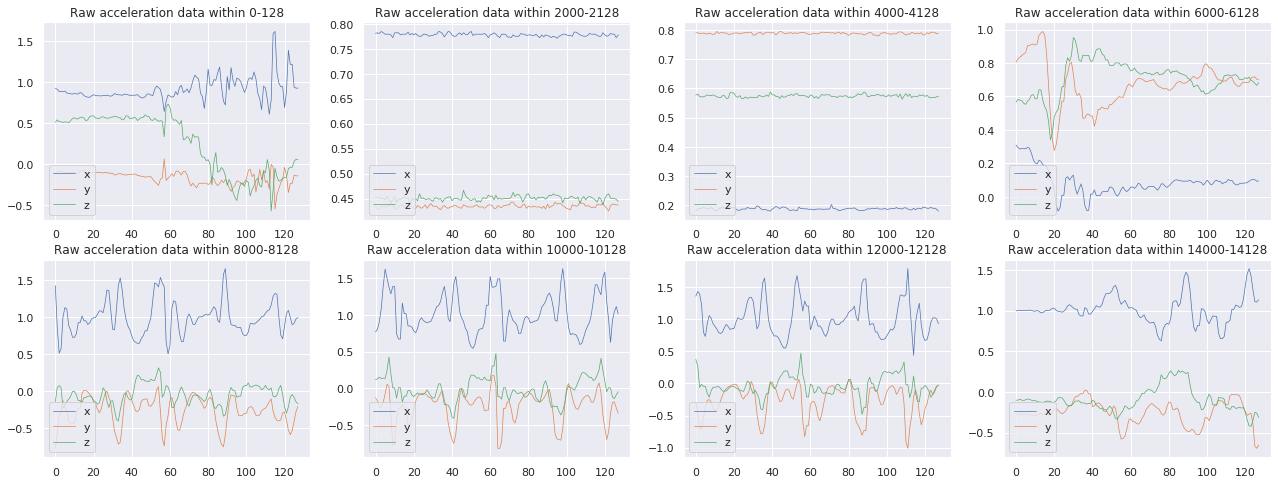

In [28]:
# Plot raw acceleration data (50Hz) every128 readings (2.56 sec)
f, ax = plt.subplots(2, 4, figsize=(22, 8))
ax = ax.flatten()
for i in range(8):
    for axis in ['x', 'y', 'z']:
        ax[i].plot(acc_exp01_user01.iloc[i*2000:i*2000+128][axis].values, label=axis, linewidth=0.7)
    ax[i].set_title(f"Raw acceleration data within {i*2000}-{i*2000+128}")
    ax[i].legend(loc='lower left')
plt.show()

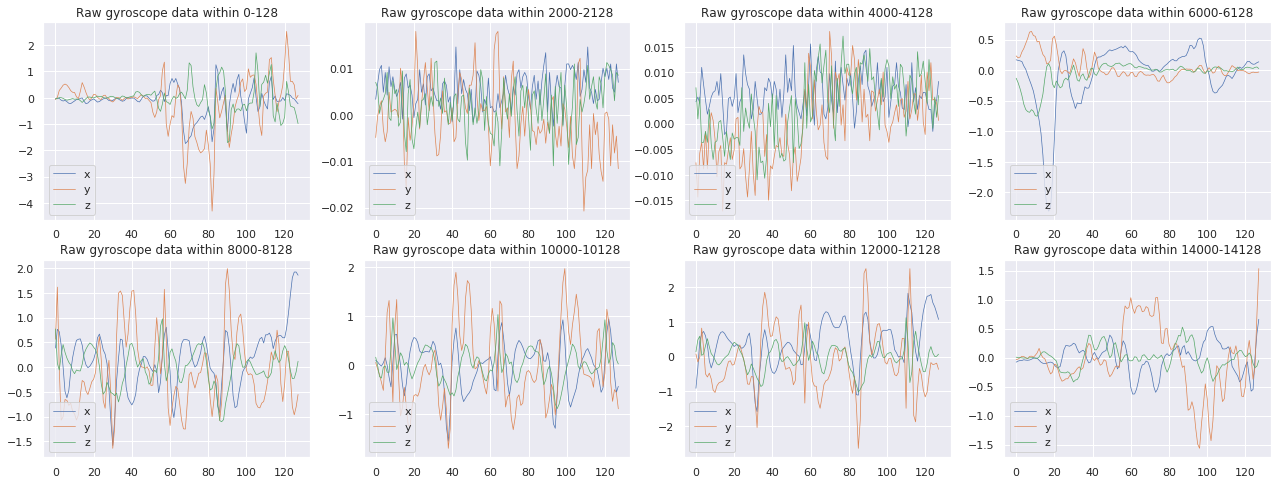

In [57]:
# Plot raw gyroscope data (50Hz) every128 readings (2.56 sec)
f, ax = plt.subplots(2, 4, figsize=(22, 8))
ax = ax.flatten()
for i in range(8):
    for axis in ['x', 'y', 'z']:
        ax[i].plot(gyro_exp01_user01.iloc[i*2000:i*2000+128][axis].values, label=axis, linewidth=0.7)
    ax[i].set_title(f"Raw gyroscope data within {i*2000}-{i*2000+128}")
    ax[i].legend(loc='lower left')
plt.show()

### 3.1 Remove noise by filtering
* Then they were filtered using a median filter and a 3rd order low pass Butterworth filter with a corner frequency of 20 Hz to remove noise.
* Median filter was applied with filter length of 5 in both acceleration and gyroscope data.

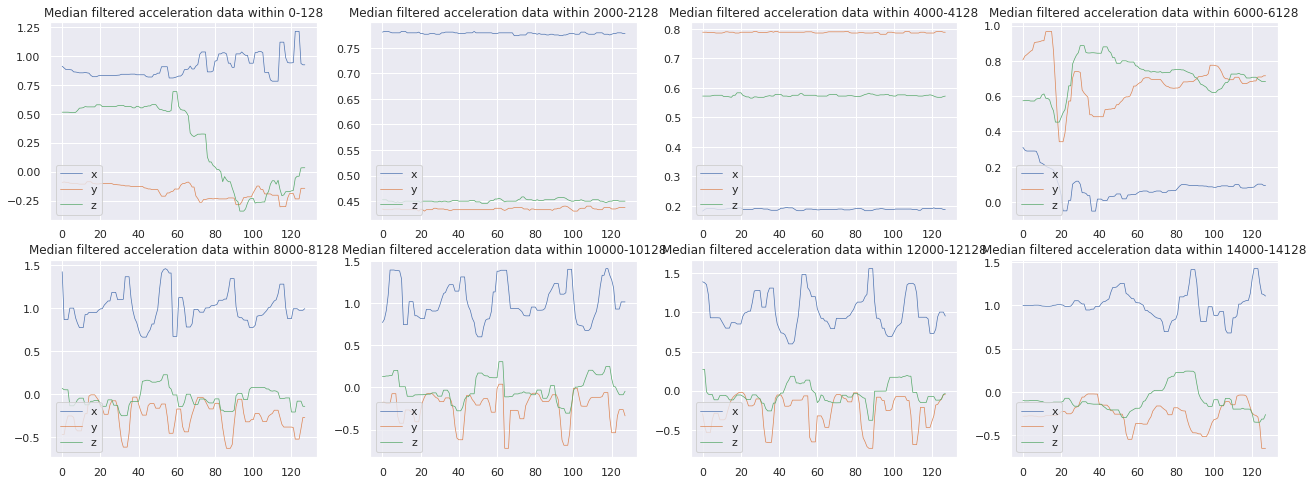

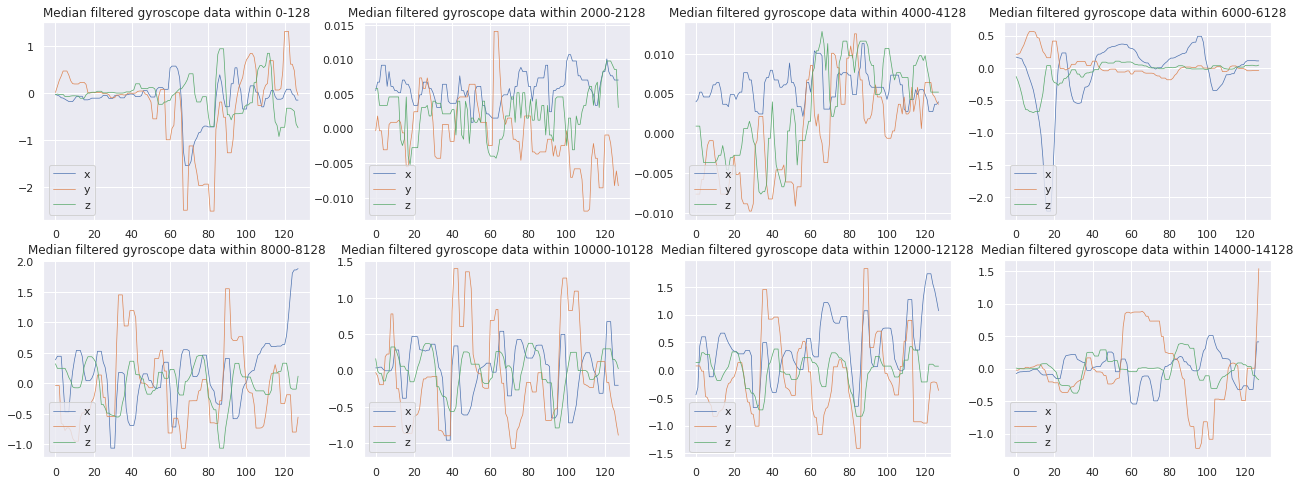

In [64]:
# Apply median filter with filter length 5.
acc_exp01_user01_med = acc_exp01_user01.rolling(window=5, center=True, min_periods=1).median()
gyro_exp01_user01_med = gyro_exp01_user01.rolling(window=5, center=True, min_periods=1).median()


# Plot acceleration data every128 readings (2.56 sec) with median filter
f, ax = plt.subplots(2, 4, figsize=(22, 8))
ax = ax.flatten()
for i in range(8):
    for axis in ['x', 'y', 'z']:
        ax[i].plot(acc_exp01_user01_med.iloc[i*2000:i*2000+128][axis].values, label=axis, linewidth=0.7)
    ax[i].set_title(f"Median filtered acceleration data within {i*2000}-{i*2000+128}")
    ax[i].legend(loc='lower left')
plt.show()


# Plot raw gyroscope data (50Hz) every128 readings (2.56 sec) with median filter
f, ax = plt.subplots(2, 4, figsize=(22, 8))
ax = ax.flatten()
for i in range(8):
    for axis in ['x', 'y', 'z']:
        ax[i].plot(gyro_exp01_user01_med.iloc[i*2000:i*2000+128][axis].values, label=axis, linewidth=0.7)
    ax[i].set_title(f"Median filtered gyroscope data within {i*2000}-{i*2000+128}")
    ax[i].legend(loc='lower left')
plt.show()

In [65]:
# Apply 3rd order low pass Butterworth filter with a corner frequency of 20 Hz.
from scipy import signal
fs = 50  # sampling frequency
fc = 20  # cutoff frequency

w = fc / (fs / 2)  # Normalize the frequency
b, a = signal.butter(3, w, 'low')  # 3rd order low pass Butterworth filter

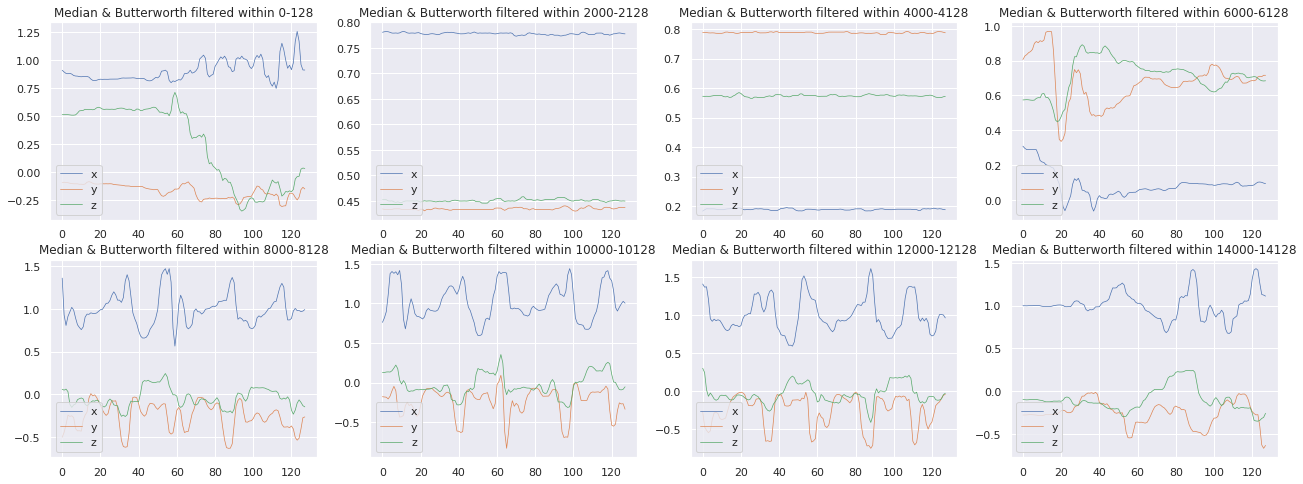

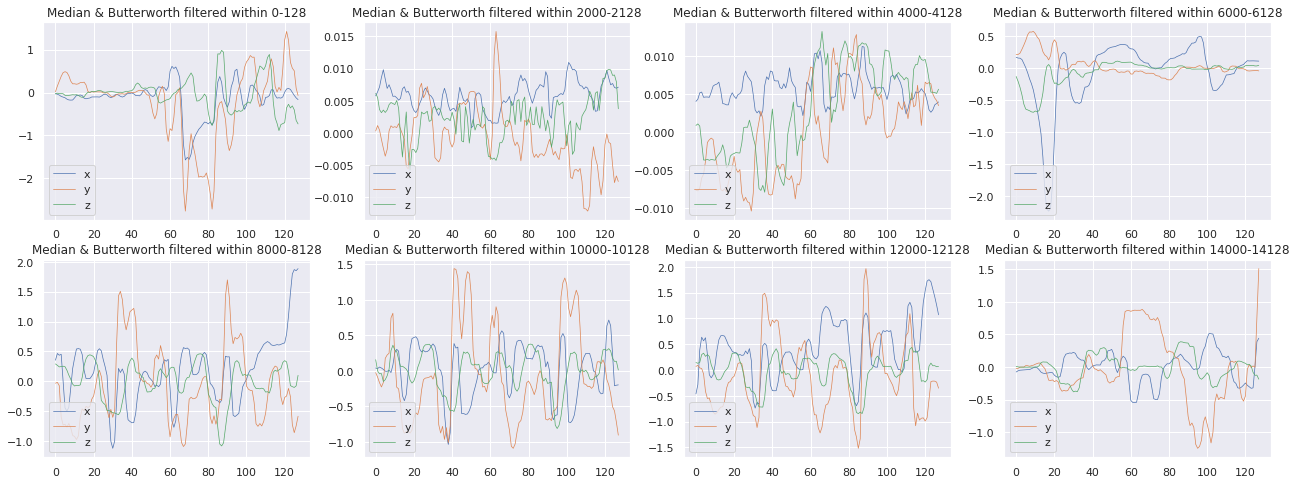

In [66]:
acc_exp01_user01_med_but = pd.DataFrame(columns=['x', 'y', 'z'])
gyro_exp01_user01_med_but = pd.DataFrame(columns=['x', 'y', 'z'])

for axis in ['x','y','z']:   
    acc_arr = acc_exp01_user01_med[axis].values
    acc_exp01_user01_med_but[axis] = signal.filtfilt(b, a, acc_arr)
    
    gyro_arr = gyro_exp01_user01_med[axis].values
    gyro_exp01_user01_med_but[axis] = signal.filtfilt(b, a, gyro_arr)


# Plot acceleration data every128 readings (2.56 sec) with median filter & Butterworth filter
f, ax = plt.subplots(2, 4, figsize=(22, 8))
ax = ax.flatten()
for i in range(8):
    for axis in ['x', 'y', 'z']:
        ax[i].plot(acc_exp01_user01_med_but.iloc[i*2000:i*2000+128][axis].values, label=axis, linewidth=0.7)
    ax[i].set_title(f"Median & Butterworth filtered within {i*2000}-{i*2000+128}")
    ax[i].legend(loc='lower left')
plt.show()


# Plot raw gyroscope data (50Hz) every128 readings (2.56 sec) with median filter & Butterworth filter
f, ax = plt.subplots(2, 4, figsize=(22, 8))
ax = ax.flatten()
for i in range(8):
    for axis in ['x', 'y', 'z']:
        ax[i].plot(gyro_exp01_user01_med_but.iloc[i*2000:i*2000+128][axis].values, label=axis, linewidth=0.7)
    ax[i].set_title(f"Median & Butterworth filtered within {i*2000}-{i*2000+128}")
    ax[i].legend(loc='lower left')
plt.show()

### 3.2 Separate acceleration signal into body and gravity acceleratin signals
* The acceleration signal was separated into body and gravity acceleration signals (tBodyAcc-XYZ and tGravityAcc-XYZ) using another low pass Butterworth filter with a corner frequency of 0.3 Hz.

In [67]:
# Apply 3rd order low pass Butterworth filter with a corner frequency of 0.3 Hz.
fs = 50  # sampling frequency
fc = 0.3  # cutoff frequency

w = fc / (fs / 2)  # Normalize the frequency
b, a = signal.butter(3, w, 'low')  # 3rd order low pass Butterworth filter

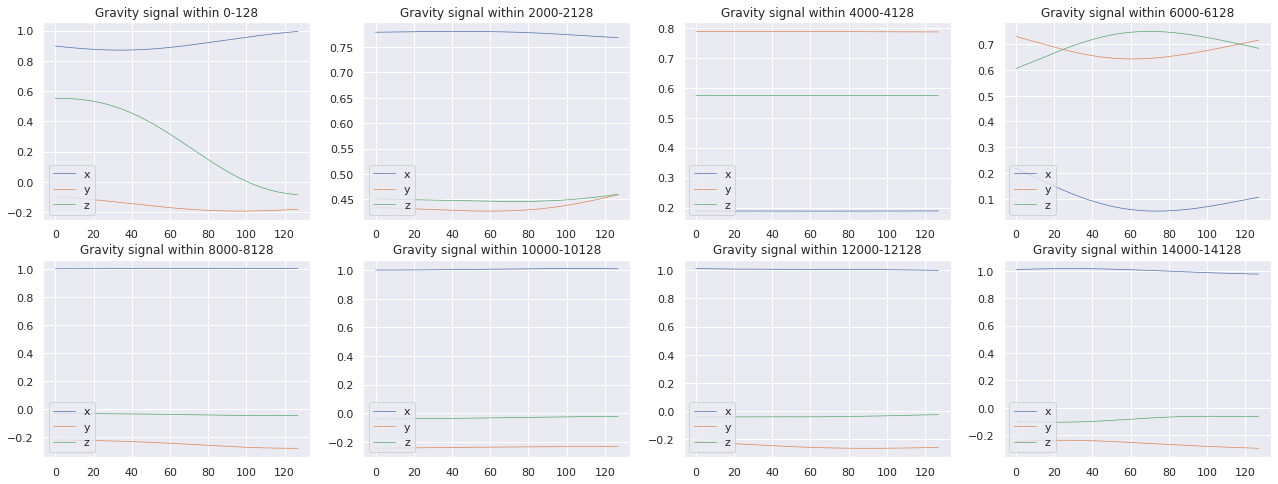

In [68]:
acc_exp01_user01_med_but_grav = pd.DataFrame(columns=['x', 'y', 'z'])

for axis in ['x','y','z']:   
    acc_arr = acc_exp01_user01_med_but[axis].values
    acc_exp01_user01_med_but_grav[axis] = signal.filtfilt(b, a, acc_arr)


# Plot gravity acceleration data every128 readings (2.56 sec) with median filter & Butterworth filter
f, ax = plt.subplots(2, 4, figsize=(22, 8))
ax = ax.flatten()
for i in range(8):
    for axis in ['x', 'y', 'z']:
        ax[i].plot(acc_exp01_user01_med_but_grav.iloc[i*2000:i*2000+128][axis].values, label=axis, linewidth=0.7)
    ax[i].set_title(f"Gravity signal within {i*2000}-{i*2000+128}")
    ax[i].legend(loc='lower left')
plt.show()

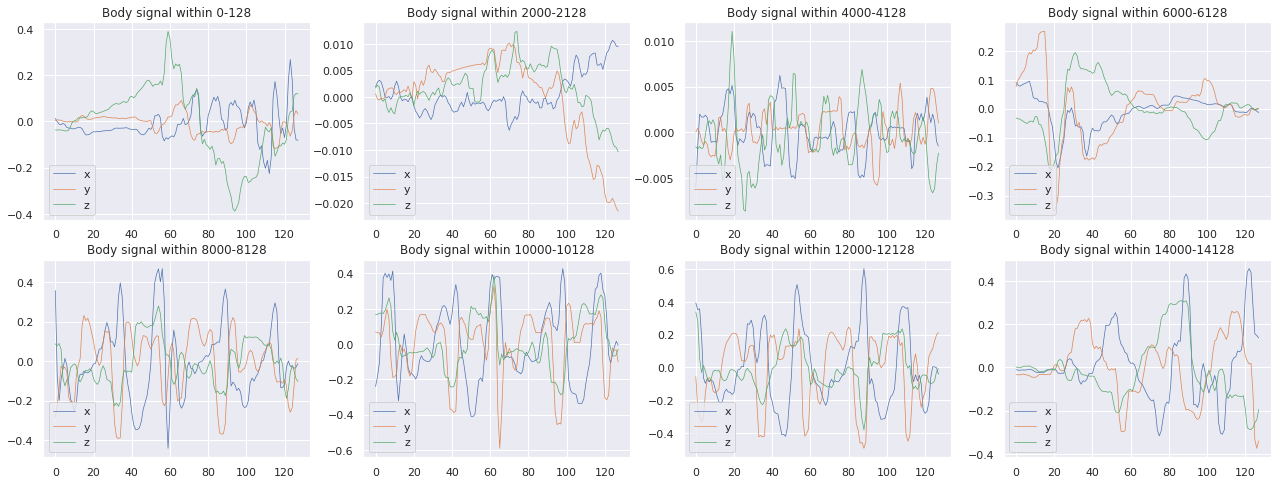

In [69]:
# Substract gravity acceleration from denoised acceleration sigal.
acc_exp01_user01_med_but_body = acc_exp01_user01_med_but - acc_exp01_user01_med_but_grav


# Plot body acceleration data every128 readings (2.56 sec) with median filter & Butterworth filter
f, ax = plt.subplots(2, 4, figsize=(22, 8))
ax = ax.flatten()
for i in range(8):
    for axis in ['x', 'y', 'z']:
        ax[i].plot(acc_exp01_user01_med_but_body.iloc[i*2000:i*2000+128][axis].values, label=axis, linewidth=0.7)
    ax[i].set_title(f"Body signal within {i*2000}-{i*2000+128}")
    ax[i].legend(loc='lower left')
plt.show()

### 3.3 Derive body linear acceleration and angular velocity to obtain Jerk signals
* The body linear acceleration and angular velocity were derived in time to obtain Jerk signals (tBodyAccJerk-XYZ and tBodyGyroJerk-XYZ). 
* Also the magnitude of these three-dimensional signals were calculated using the Euclidean norm (tBodyAccMag, tGravityAccMag, tBodyAccJerkMag, tBodyGyroMag, tBodyGyroJerkMag). 

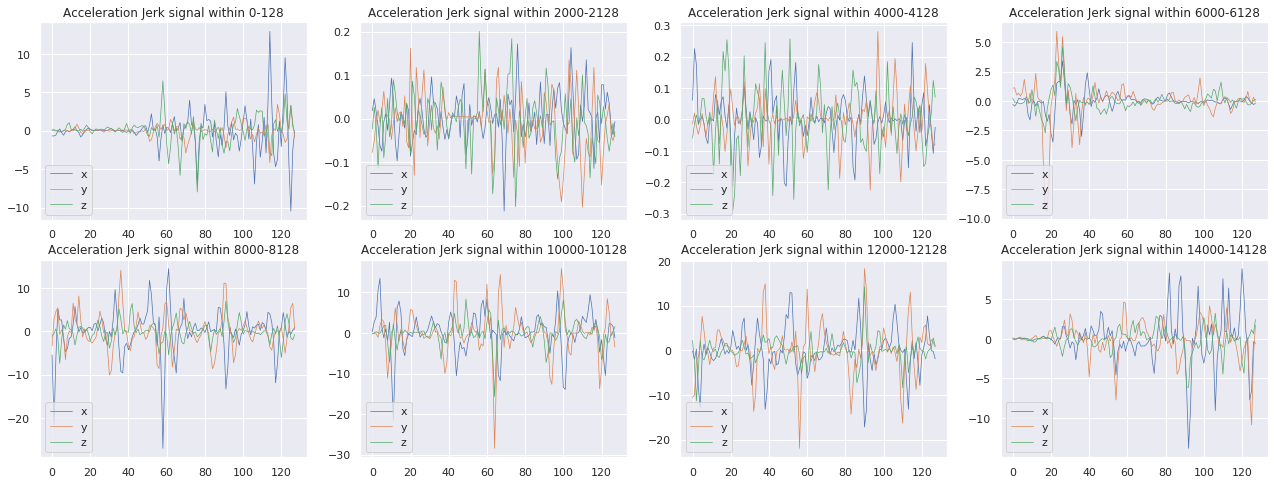

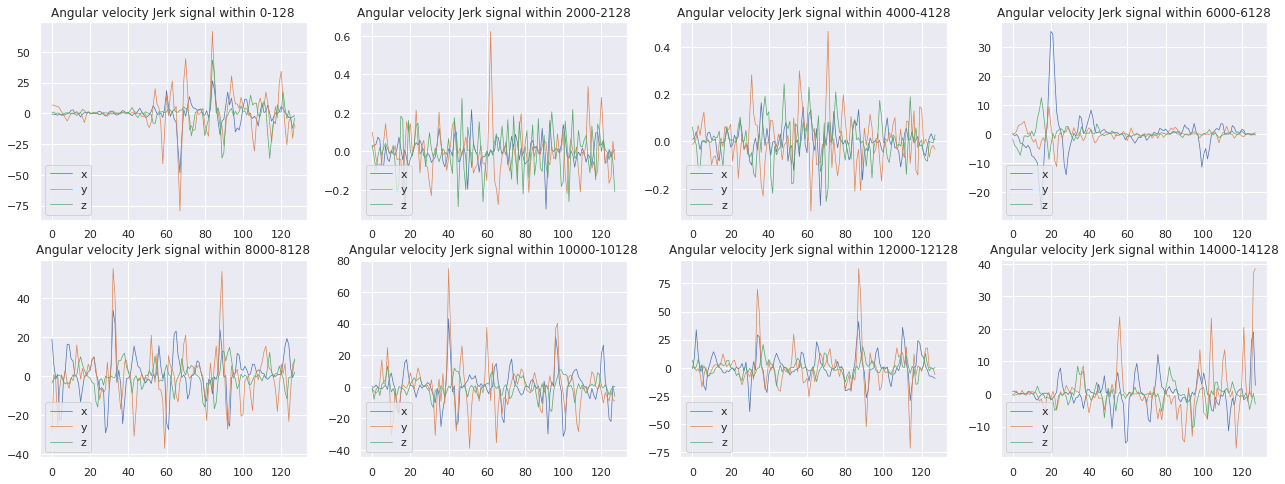

In [79]:
# Calculate Jerk signals.
acc_exp01_user01_med_but_body_jerk = acc_exp01_user01_med_but_body.diff(periods=1)  # Calculate difference 
acc_exp01_user01_med_but_body_jerk.iloc[0] = acc_exp01_user01_med_but_body_jerk.iloc[1]  # Fillna
acc_exp01_user01_med_but_body_jerk = acc_exp01_user01_med_but_body_jerk / 0.02  # Derive in time (50Hz)

gyro_exp01_user01_med_but_jerk = gyro_exp01_user01_med_but.diff(periods=1)  # Calculate difference 
gyro_exp01_user01_med_but_jerk.iloc[0] = gyro_exp01_user01_med_but_jerk.iloc[1]  # Fillna
gyro_exp01_user01_med_but_jerk = gyro_exp01_user01_med_but_jerk / 0.02  # Derive in time (50Hz)


# Plot acceleration Jerk signals
f, ax = plt.subplots(2, 4, figsize=(22, 8))
ax = ax.flatten()
for i in range(8):
    for axis in ['x', 'y', 'z']:
        ax[i].plot(acc_exp01_user01_med_but_body_jerk.iloc[i*2000:i*2000+128][axis].values, label=axis, linewidth=0.7)
    ax[i].set_title(f"Acceleration Jerk signal within {i*2000}-{i*2000+128}")
    ax[i].legend(loc='lower left')
plt.show()

# Plot angular velocity Jerk signals
f, ax = plt.subplots(2, 4, figsize=(22, 8))
ax = ax.flatten()
for i in range(8):
    for axis in ['x', 'y', 'z']:
        ax[i].plot(gyro_exp01_user01_med_but_jerk.iloc[i*2000:i*2000+128][axis].values, label=axis, linewidth=0.7)
    ax[i].set_title(f"Angular velocity Jerk signal within {i*2000}-{i*2000+128}")
    ax[i].legend(loc='lower left')
plt.show()

tBodyAccMag, tGravityAccMag, tBodyAccJerkMag, tBodyGyroMag, tBodyGyroJerkMag

In [ ]:
# Calculate the magnitude of three-dimensional signals using the Euclidean norm.
df  = acc_exp01_user01_med_but_body ** 2
df = df.sum(axis=1)
acc_exp01_user01_med_but_body_mag = np.sqrt(df)